<h2 style="color:blue" align="center"> SPARKS FOUNDATION </h2>
<h2 style="color:blue" align="center"> TSF DATA SCIENCE TASK 1 </h2>
<h3 style="color:blue" align="center"> PREDICTION USING SUPERVISED ML</h3>
<h3 style="color:blue" align="center"> MARGARET OLUWADARE</h3>
<h3 style="color:blue" align="center"> Data Science and Business Analytics intern at The Sparks Foundation.</h3>


Flow of Analysis
1. Introduction
2. Import the required libraries
3. Exploratory Data Analysis
4. Building a prediction model

<p> If a machine's performance on a specific task gets better with experience, it is said to be learning from prior experiences (data feed-in) with regard to a certain class of activities. Consider, for instance, that a machine needs to forecast whether a customer will purchase a brand of sport boot this year or not. The computer will determine this by examining prior knowledge and experiences, or the data of the items that the client had purchased year. For example, if the customer consistently purchases Nike, there is a good chance that he will do so again this year.</p> <br> 

<p> Supervised learning is when the model is getting trained on a labelled dataset. A labelled dataset is one that has both input and output parameters. In this type of learning both training and validation, datasets are labelled. There are two types of supervised machine learning: <b> Classification and Regression</b> </p>.

<p> There are several examples of supervised ML
    
* Linear Regression
* Logistic Regression
* Nearest Neighbor
* Gaussian Naive Bayes
* Decision Trees
* Support Vector Machine (SVM)
* Random Forest



## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required for this analysis
import pandas as pd
import numpy as np  
import warnings  

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

# for modelling
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Exploratory Data Analysis**

<p> We will check for missing values and other information to determine of the data needs cleaning. From below result, we can observe that there is no null value in our dataset so there is no need of cleaning the data. The dataset is made up of two columns namely <b> Hours and Scores</b> with about 25 row entries.

In [3]:
#Chech whether is there any null value present in our
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Visualise the data by ploting our data points on 2-D graph to  if we can manually find any relationship between the data. We can create the plot with the following script:

**From the graph below, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

Text(0.5, 1.0, 'Hours vs Scores Graph')

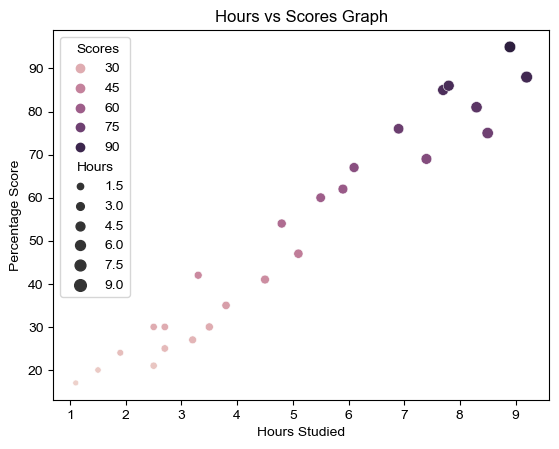

In [4]:
# Plotting the distribution of scores
pl = sns.scatterplot(data=data,x='Hours',y='Scores',hue='Scores',size='Hours')
sns.set(rc={'figure.figsize':(8,8)})
pl.set_xlabel('Hours Studied')
pl.set_ylabel('Percentage Score')
pl.set_title('Hours vs Scores Graph')

### **Data Preparation**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs) and split the data into <b> Testing and Training </b> data set using Scikit-Learn built-in train_test_split() method.

In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Model Training**
### ***Training the Simple linear regression Algorithm***
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


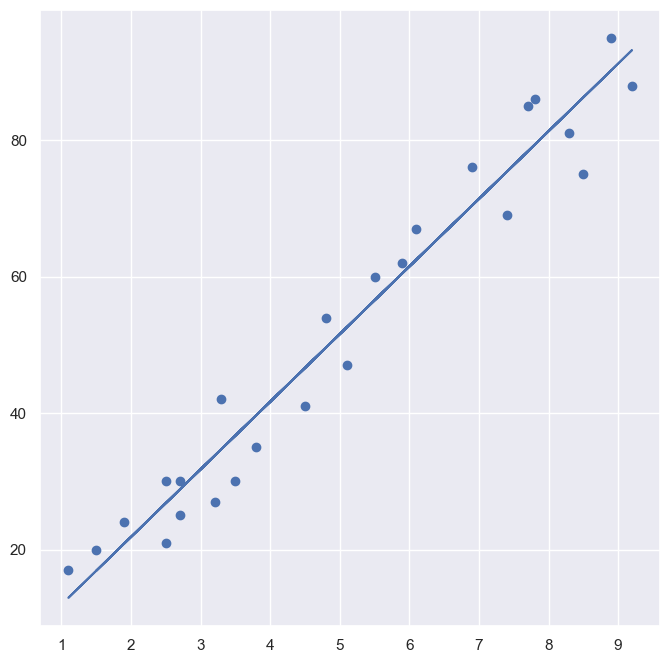

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [12]:
print("Accuracy is :", regressor.score(X_test, y_test))

Accuracy is : 0.9454906892105356


In [13]:
# Testing the sample data point given
hours = float(input('No of Hours you will study is:'))
own_pred = regressor.predict([[hours]])

print("Predicted Score = {}".format(own_pred[0]))

No of Hours you will study is:9.25
Predicted Score = 93.69173248737538


### **Evaluating the model**

Finally, we will evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean absolute error of which the lower the result the better. 

In [14]:
 print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


### **Conclusion**

It can be seen that from the result, the simple linear regression fit the given data set.